### The EDA notebook!

https://drivendata.github.io/cookiecutter-data-science/

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import skimage.draw
import numpy as np
from tqdm import tqdm
import cv2
import random
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


'''Structure dataset in two folders'''

def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        
label_map = {'Epithelial':1,
             'Lymphocyte':2,
             'Macrophage':4,
             'Neutrophil':3,
            }


# Root directory of the project
ROOT_DIR = os.path.abspath("..")

# Directory of images to run detection on
IMAGES_DEST =  os.path.join(ROOT_DIR, "dataset", "data_processedv0", "images/")
MASKS_DEST = os.path.join(ROOT_DIR, "dataset", "data_processedv0", "masks/")

In [7]:
IMAGES_DEST, MASKS_DEST

('/home/hasib/hasib/MoNuSAC-ISBI-2020/dataset/data_processedv0/images/',
 '/home/hasib/hasib/MoNuSAC-ISBI-2020/dataset/data_processedv0/masks/')

In [8]:
def pad(im, desired_size = 900):
    "pad image"
    old_size = im.shape[:2] # old_size is in (height, width) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    
    return new_im


def read_nuclei(path):
    "read raw data"

    # Load 4-channel image
    img = skimage.io.imread(path)
    
    # input image
    if len(img.shape) > 2:
        img = img[:,:,:3]
    # mask
    else:
        # do nothing
        pass
        
    return img



def save_nuclei(path, img):
    "save image"
    skimage.io.imsave(path, img)
    

(1170, 1090, 3)
uint8


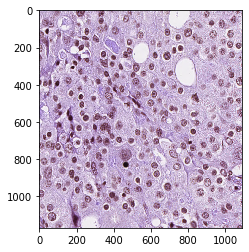

In [4]:
image = read_nuclei("x.tif")
print(image.shape)
print(image.dtype)
plt.imshow(image)

In [9]:
import scipy.io
m1 = scipy.io.loadmat('400.mat')
m2 = scipy.io.loadmat('401.mat')
#m3 = scipy.io.loadmat('243.mat')

In [10]:
m1

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Mar  4 14:44:38 2020',
 '__version__': '1.0',
 '__globals__': [],
 'n_ary_mask': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)}

In [11]:
m1['n_ary_mask'].shape

(446, 512)

In [12]:
m2

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Mar  4 14:44:38 2020',
 '__version__': '1.0',
 '__globals__': [],
 'n_ary_mask': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)}

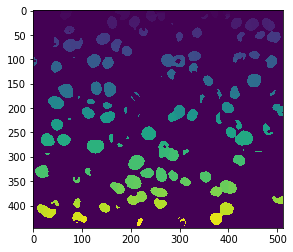

In [13]:
plt.imshow(m1['n_ary_mask'])

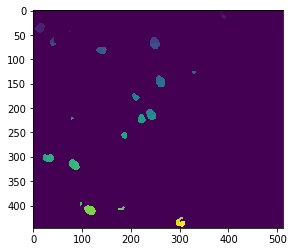

In [14]:
plt.imshow(m2['n_ary_mask'])

In [15]:
np.unique(m2['n_ary_mask'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41], dtype=int32)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

image.shape

(80, 80)

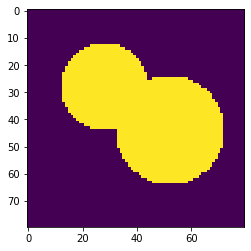

In [11]:
plt.imshow(image)

In [12]:
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)

In [13]:
distance

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
local_maxi

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [15]:
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

In [16]:
markers.shape

(80, 80)

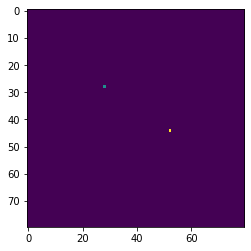

In [17]:
plt.imshow(markers)

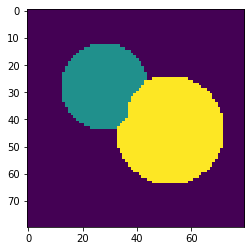

In [18]:
plt.imshow(labels)

In [19]:
image.shape

(80, 80)

In [30]:
def instance_seg(image):
    distance = ndi.distance_transform_edt(image)
    local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((7, 7)), labels=image)
    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask=image)
    return labels    

In [31]:
inst_mask = instance_seg(image)

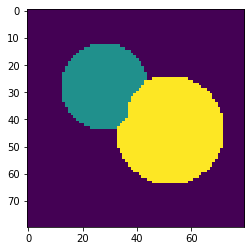

In [32]:
plt.imshow(inst_mask)

In [33]:
np.unique(inst_mask)

array([0, 1, 2], dtype=int32)

In [23]:
val = image.flatten()
max(val)

# for ground truth mask
# returns multiple values after padding, it should not!
#np.unique(val)

True

In [24]:
#norm=plt.Normalize(0,4)
#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","green", "blue"])
#plt.imshow(y_ep, cmap=cmap, norm=norm)

(1170, 1090)
float64


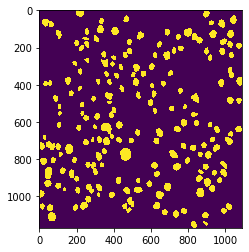

In [34]:
y_ep = read_nuclei("y_ep.tif")
print(y_ep.shape)
print(y_ep.dtype)
plt.imshow(y_ep)

In [35]:
y_ep_inst = instance_seg(y_ep)
y_ep_inst.shape

(1170, 1090)

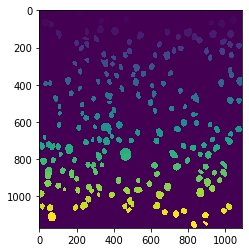

In [36]:
plt.imshow(y_ep_inst)

In [37]:
np.unique(y_ep_inst)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [28]:
image.shape[:2] == y_ep.shape

False

In [9]:
val = y_ep.flatten()
max(val)

np.unique(val)

array([  0., 255.])

In [10]:
test = np.where(y_ep==255.0, 1.0, y_ep) 
test.shape

(1170, 1090)

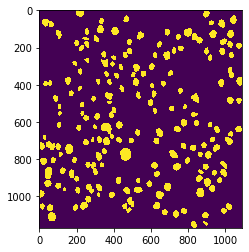

In [11]:
plt.imshow(test)

In [12]:
val = test.flatten()
max(val)

np.unique(val)

array([0., 1.])

In [13]:
test.dtype

dtype('float64')

(1170, 1090)
float64


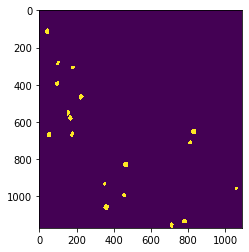

In [33]:
y_ly = read_nuclei("y_ly.tif")
print(y_ly.shape)
print(y_ly.dtype)
plt.imshow(y_ly)

In [35]:
y_ly_inst = instance_seg(y_ly)
y_ly_inst.shape

(1170, 1090)

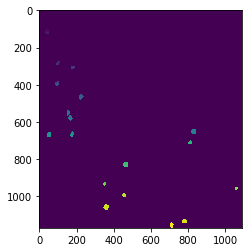

In [36]:
plt.imshow(y_ly_inst)

In [37]:
np.unique(y_ly_inst)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int32)

In [15]:
val = y_ly.flatten()
max(val)

np.unique(val)

array([  0., 255.])

In [16]:
test2 = np.where(y_ly==255.0, 2.0, y_ly) 
test2.shape

(1170, 1090)

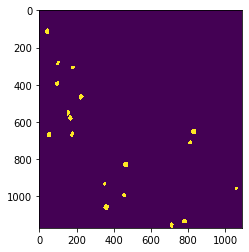

In [17]:
plt.imshow(test2)

In [18]:
val = test2.flatten()
max(val)

np.unique(val)

array([0., 2.])

In [19]:
test2.dtype

dtype('float64')

In [20]:
# overlay two masks

mask = np.maximum(test, test2)
mask.shape

(1170, 1090)

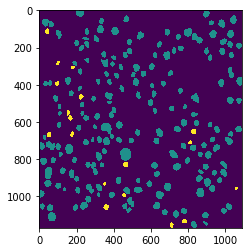

In [21]:
plt.imshow(mask)

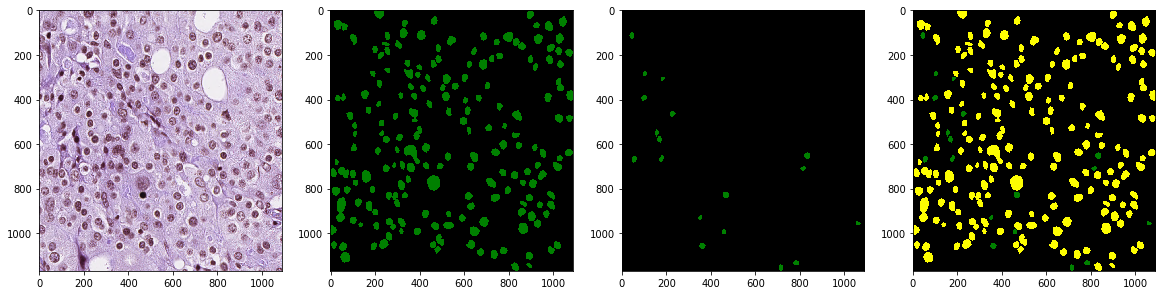

In [22]:
f, axarr = plt.subplots(1,4, figsize=(20,20))

# Stolen from https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale 
norm=plt.Normalize(0,4) # 5 classes including BG
map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue", "green"])
#map_name = 'magma'

axarr[0].imshow(image, cmap=map_name)
axarr[1].imshow(test, cmap=map_name)
axarr[2].imshow(test2, cmap=map_name)
axarr[3].imshow(mask, cmap=map_name)

In [23]:
np.unique(mask)

array([0., 1., 2.])

In [24]:
#def process(img):
#    plt.figure(figsize=(8,8))
#    plt.imshow(img)
    
#images = [image, mask]
#for file in images:
#    process(file)

[0. 1. 2.]


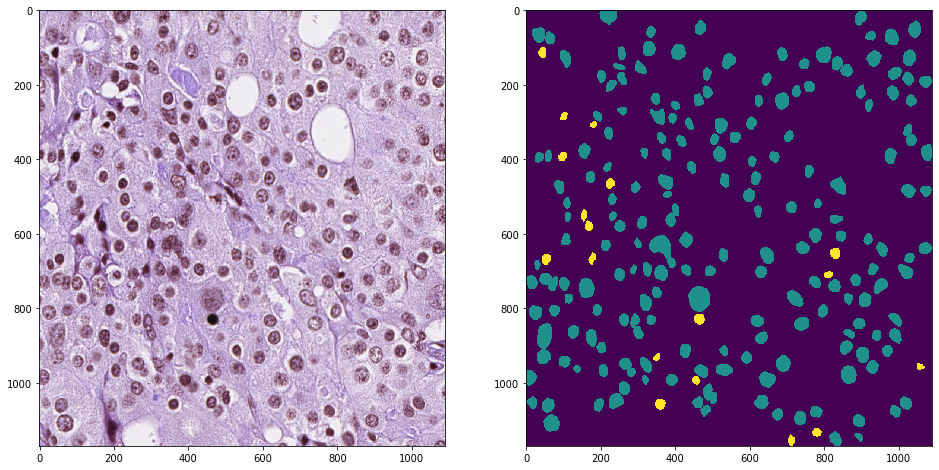

In [25]:
f, axarr = plt.subplots(1,2, figsize=(16,16))


print(np.unique(mask))

axarr[0].imshow(image)
axarr[1].imshow(mask)

## Make patches

In [26]:
#img = read_nuclei("a.png")
#gt = read_nuclei("a_mask.png")

#print(img.shape)
#print(img.dtype)

#print(gt.shape)
#print(gt.dtype)

Index:  56
(865, 1101, 3) (865, 1101)
Ground truth classes:  [0 1 3]


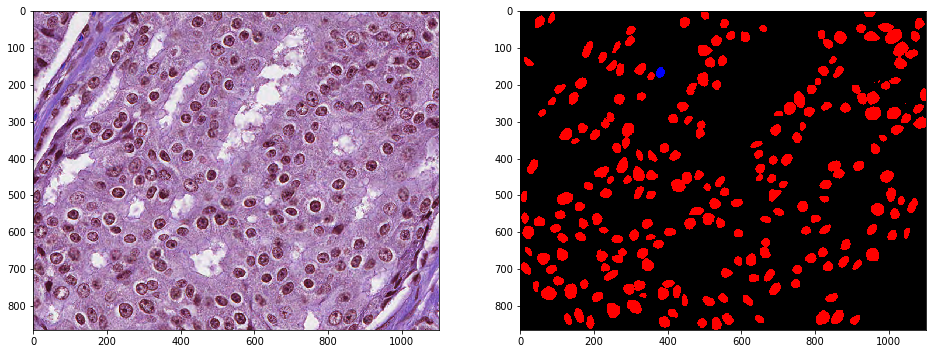

In [4]:
# Load a random image from the images folder
image_fns = sorted(next(os.walk(IMAGES_DEST))[2])
gt_fns = sorted(next(os.walk(MASKS_DEST))[2])


idx = random.randrange(len(image_fns)) # 94 
print("Index: ", idx)


image = skimage.io.imread(os.path.join(IMAGES_DEST, image_fns[idx]))
gt = skimage.io.imread(os.path.join(MASKS_DEST, gt_fns[idx]))

assert image.shape[:2] == gt.shape, "Wrong image or ground truth!"
assert image.dtype == gt.dtype, "Wrong data types!"

print(image.shape, gt.shape)

val1 = gt.flatten()
print("Ground truth classes: ", np.unique(val1))

#label_map = {'Epithelial':1,
#             'Lymphocyte':2,
#             'Macrophage':4,
#             'Neutrophil':3,
#            }

# Stolen from https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale 
norm=plt.Normalize(0,4) # 5 classes including BG
map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue", "green"])
#map_name = 'magma'

f, axarr = plt.subplots(1,2, figsize=(16,16))

# idx = 154 all classes
axarr[0].imshow(image, cmap=map_name, norm=norm)
axarr[1].imshow(gt, cmap=map_name, norm=norm)

In [36]:
# Check if images and gt match in data_processedv0
image_fns = sorted(next(os.walk(IMAGES_DEST))[2])
gt_fns = sorted(next(os.walk(MASKS_DEST))[2])

fc = 0
for x,y in tqdm(zip(image_fns, gt_fns)):
    image = skimage.io.imread(os.path.join(IMAGES_DEST, x))
    gt = skimage.io.imread(os.path.join(MASKS_DEST, y))
    #print(image.shape[:2], gt.shape)
    
    if image.shape[:2] == gt.shape:
        #print(True)
        pass
    else:
        fc+=1
        print(False)
        
print("False count :", fc)

209it [00:10, 19.41it/s]

False count : 0


In [25]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
# Use the array data from the first image in this dataset:

one_image = load_sample_image("china.jpg")
print('Image shape: {}'.format(one_image.shape))

Image shape: (427, 640, 3)


In [42]:
def extract_patches(whole_slide):
    """
    get patches
    
    https://scikit-learn.org/stable/modules/feature_extraction.html#image-feature-extraction
    https://github.com/scikit-learn/scikit-learn/issues/10910
    """
    
    patches = image.extract_patches_2d(whole_slide, (2, 2), random_state=42)
    return patches

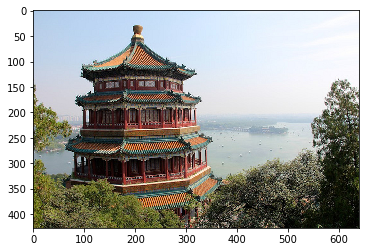

In [27]:
plt.imshow(one_image)

In [20]:
patches = None
patches = image.extract_patches_2d(one_image, (2, 2), random_state=42)
print('Patches shape: {}'.format(patches.shape))

Patches shape: (272214, 2, 2, 3)


In [1]:
#reconstructed = image.reconstruct_from_patches_2d(patches, (2, 2, 3))
#print(np.testing.assert_array_equal(one_image, reconstructed))

In [42]:
print(patches[1].shape)

(50, 50, 3)


In [43]:
print(patches[800].shape)

(50, 50, 3)


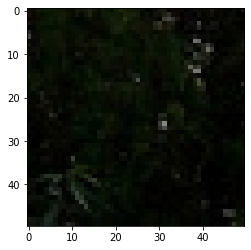

In [46]:
plt.imshow(patches[])